### Quantum Teleportation
We aim to achieve teleportation of a given qubit Q = α|0) + β|1) from location A to an arbitarily far away location B.

  We start with two separate qubits that are entangled, say the |𝚽+) EPR pair with qubits q1 and q2, and send q1 to location A, and q2 to location B.
  To achieve teleportation, we want to entangle Q with the EPR pair. We can do so by applying the CNOT gate to Q(control) and q1(target). 

    The combined state of the the 3 qubits Q, q1, q2 is: (1/sqrt(2)) [ α(|000)+|011)) + β(|110)+|101)) ] 





In [ ]:
!pip install qiskit
!pip install 'qiskit[visualization]'

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit.visualization import plot_histogram

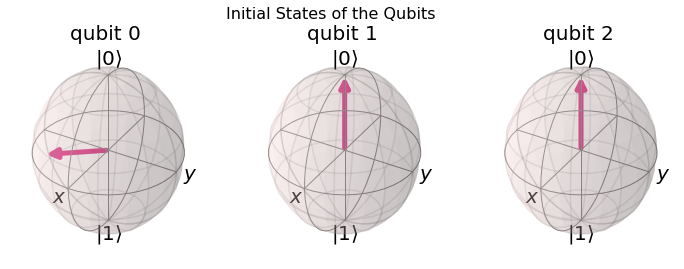

In [ ]:
circuit = QuantumCircuit(3, 2) # Q, q1, q2, along with 2 classical bits to store measurement information

# Giving Q an initial state to be teleported
circuit.ry(np.pi/3, 0)
circuit.rx(np.pi/3, 0)

state = Statevector(circuit)
plot_bloch_multivector(state, title='Initial States of the Qubits')

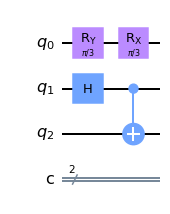

In [ ]:
# Creating the EPR pair q1, q2
circuit.h(1)
circuit.cx(1,2)

circuit.draw('mpl')

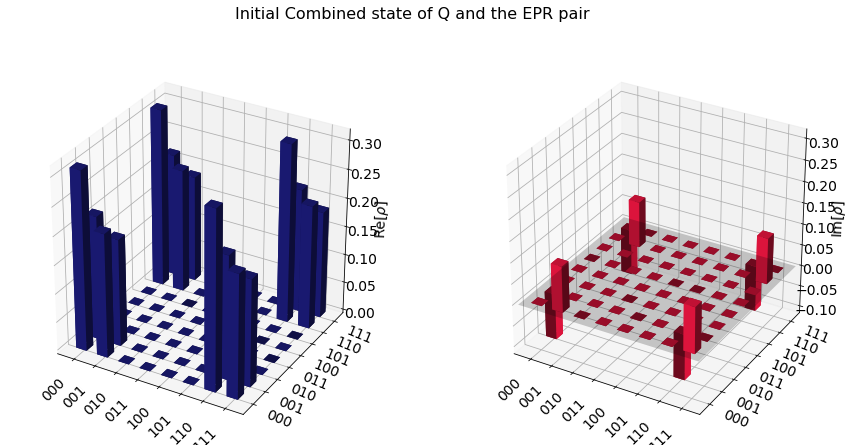

In [ ]:
state = Statevector(circuit)
plot_state_city(state, color=['midnightblue', 'crimson'], title="Initial Combined state of Q and the EPR pair", figsize=(15,7))

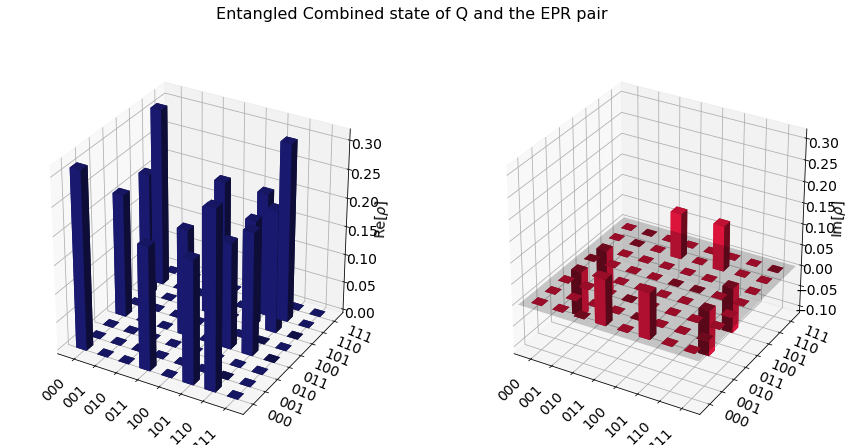

In [ ]:
# Entangling Q with the EPR pair
circuit.cx(0,1)

state = Statevector(circuit)
plot_state_city(state, color=['midnightblue', 'crimson'], title="Entangled Combined state of Q and the EPR pair", figsize=(15,7))

We then apply the Hadamard gate H to Q to get the final amplitudes in a desirable form, to get the final combined state as:

    Combined state : (1/2) [ |00)[ α|0)+β|1) ] + |01)[ β|0)+α|1) ] + |10)[ α|0)-β|1) ] + |11)[ -β|0)+α|1) ] ]

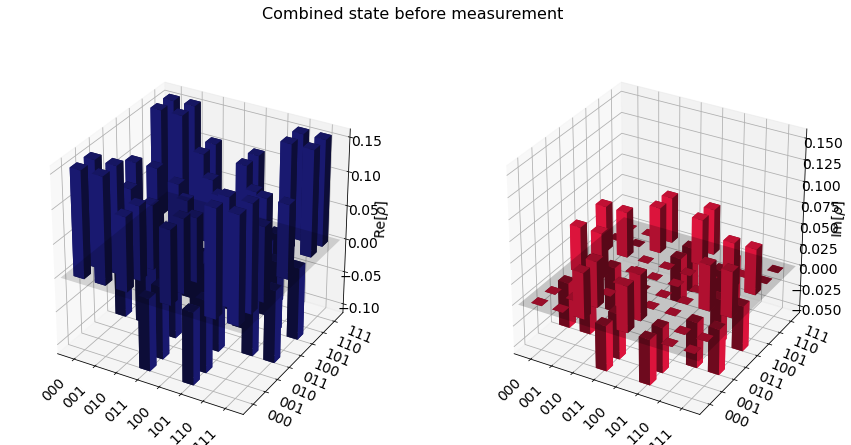

In [ ]:
# Applying H gate to Q
circuit.h(0)

state = Statevector(circuit)
plot_state_city(state, color=['midnightblue', 'crimson'], title="Combined state before measurement", figsize=(15,7))

From the combined state equation give above, we notice that if we measure Q and q1, and let the combined state of the 3 qubits collapse, the resulting state of q2 can always be converted to the initial state of Q through basic quantum gates.

    ## The can leave q2 as it is if the measurement result of Q q1 is |00),
    ## apply an X gate when it is |01)
    ## apply a Z gate when it is |10)
    ## and apply gates X and Z consecutively when the measurement result is |11).

  Equivalenty, we can simply apply a controlled X gate (q1-control q2-target) and a controlled Z gate (Q-control q2-target).
  
  From the principle of deffered measurement, we can apply the above 2 gates before the measurement.

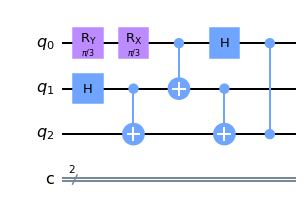

In [ ]:
# Applying the cx and cz gates to q2
circuit.cx(1,2)
circuit.cz(0,2)

# Final teleportation circuit before measurement
circuit.draw("mpl")


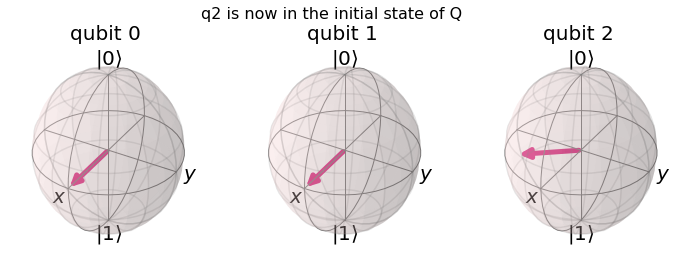

In [ ]:
state = Statevector(circuit)
plot_bloch_multivector(state, title='q2 is now in the initial state of Q')

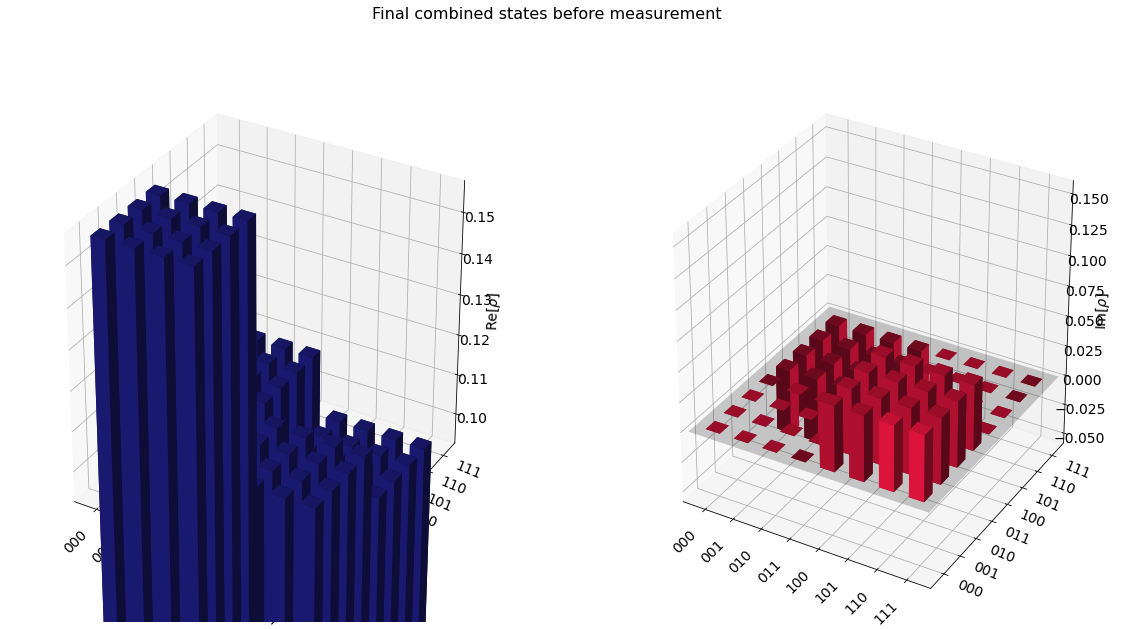

In [ ]:
plot_state_city(state, color=['midnightblue', 'crimson'], title="Final combined states before measurement", figsize=(20,10))

The state of q2 is no longer dependent on the measurement results of Q and q1, as it was converted to the initial state of Q finally through the use of the above controlled X and Z gates.

Hence q2 is no longer entangled with Q and q1, and the above bloch sphere of q2 will be remain the same after the measurement of other two qubits.

In [ ]:
# Measuring Q and q1
circuit.measure([0,1], [0,1])

circuit.clbits

[Clbit(ClassicalRegister(2, 'c'), 0), Clbit(ClassicalRegister(2, 'c'), 1)]

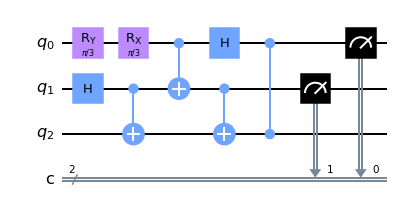

In [ ]:
# Final teleportation circuit after measurement
circuit.draw("mpl")

The initial state of Q has been altered due to observations, which is consistent with the *No Cloning Theorm*.